# hồi quy tuyến tính đa biến 

In [1]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
def load_iris_data():
    # Load bộ dữ liệu Iris
    iris = load_iris()

    # Chuyển đổi dữ liệu thành DataFrame
    df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                     columns=iris['feature_names'] + ['target'])

    return df, iris['feature_names']

In [3]:
def prepare_multivariate_data(df, target_index=0, scale=True):
  """
    Chuẩn bị dữ liệu cho mô hình hồi quy đa biến

    Tại sao cần chuẩn hóa dữ liệu (StandardScaler)?

    1. Đồng nhất hóa phạm vi giá trị:
       - Các đặc trưng có thể có các đơn vị và phạm vi giá trị khác nhau
       - Ví dụ: sepal length (4.3-7.9 cm) vs sepal width (2.0-4.4 cm)
       - Chuẩn hóa giúp đưa tất cả về cùng phạm vi, thường là mean=0 và std=1

    2. Cải thiện quá trình tối ưu với Gradient Descent:
       Gradient Descent là gì?
       - Là thuật toán tối ưu để tìm giá trị nhỏ nhất (minimum) của hàm mất mát (loss function)
       - Hoạt động bằng cách lặp đi lặp lại các bước:
         a) Tính gradient (đạo hàm) của hàm mất mát
         b) Di chuyển theo hướng ngược với gradient để giảm giá trị hàm mất mát
         c) Kích thước bước di chuyển được điều chỉnh bởi learning rate

       Tại sao chuẩn hóa giúp Gradient Descent?
       - Khi các đặc trưng có phạm vi khác nhau:
         + Đặc trưng có giá trị lớn tạo gradient lớn
         + Đặc trưng có giá trị nhỏ tạo gradient nhỏ
         + Dẫn đến quá trình học không đồng đều

       - Sau khi chuẩn hóa:
         + Tất cả đặc trưng có cùng phạm vi
         + Gradient của các đặc trưng có độ lớn tương đương
         + Quá trình học diễn ra đồng đều và hiệu quả hơn
         + Tốc độ hội tụ nhanh hơn

       Ví dụ với hồi quy tuyến tính:
       - Hàm mất mát: MSE = 1/n * Σ(y_pred - y_true)²
       - Gradient của MSE với respect to w: ∂MSE/∂w = 2/n * Σ(y_pred - y_true) * x
       - Nếu x có giá trị lớn → gradient lớn → bước cập nhật lớn
       - Nếu x có giá trị nhỏ → gradient nhỏ → bước cập nhật nhỏ
       → Chuẩn hóa giúp cân bằng độ lớn của các bước cập nhật

    3. Giúp so sánh hệ số một cách công bằng:
       - Khi các đặc trưng đã chuẩn hóa, độ lớn của hệ số phản ánh
         trực tiếp tầm quan trọng của đặc trưng đó
       - Không bị ảnh hưởng bởi đơn vị đo

    Params:
        df (DataFrame): DataFrame chứa dữ liệu
        target_index (int): Chỉ số của đặc trưng đầu ra (0-3)
        scale (bool): Có thực hiện chuẩn hóa dữ liệu hay không

    Returns:
        tuple: (X_train, X_test, y_train, y_test) đã được xử lý
    """

  # Tách features (X) và target (y)
  # Chọn tất cả các cột làm đặc trưng, trừ cột target
  features = df.iloc[:, [i for i in range(4) if i != target_index]]

  # In thông tin về phạm vi giá trị của các đặc trưng trước khi chuẩn hóa
  print("\nPhạm vi giá trị của các đặc trưng trước khi chuẩn hóa:")
  for column in features.columns:
      print(f"{column}:")
      print(f"  - Min: {features[column].min():.2f}")
      print(f"  - Max: {features[column].max():.2f}")
      print(f"  - Mean: {features[column].mean():.2f}")
      print(f"  - Std: {features[column].std():.2f}")

  # Chọn biến mục tiêu (y)
  target = df.iloc[:, target_index]

  # Chia dữ liệu thành tập huấn luyện và tập kiểm tra
  X_train, X_test, y_train, y_test = train_test_split(
      features, target, test_size=0.2, random_state=42
  )
  # Chuẩn hóa dữ liệu nếu được yêu cầu
  if scale:
      # StandardScaler thực hiện chuẩn hóa theo công thức:
      # z = (x - μ) / σ
      # trong đó:
      # - x là giá trị gốc
      # - μ là giá trị trung bình
      # - σ là độ lệch chuẩn
      # Kết quả: các đặc trưng sẽ có mean=0 và std=1
      scaler = StandardScaler()

      # Fit scaler trên tập train và transform cả train và test
      # Quan trọng: chỉ fit trên tập train để tránh data leakage
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      # Chuyển về DataFrame để giữ tên cột và in thông tin
      X_train = pd.DataFrame(X_train, columns=features.columns)
      X_test = pd.DataFrame(X_test, columns=features.columns)

      print("\nPhạm vi giá trị sau khi chuẩn hóa (tập train):")
      for column in X_train.columns:
          print(f"{column}:")
          print(f"  - Min: {X_train[column].min():.2f}")
          print(f"  - Max: {X_train[column].max():.2f}")
          print(f"  - Mean: {X_train[column].mean():.2f}")
          print(f"  - Std: {X_train[column].std():.2f}")

      # Visualization của phân phối trước và sau khi chuẩn hóa
      plt.figure(figsize=(15, 5))

      # Trước khi chuẩn hóa
      plt.subplot(1, 2, 1)
      features.boxplot()
      plt.title('Phân phối trước khi chuẩn hóa')
      plt.xticks(rotation=45)

      # Sau khi chuẩn hóa
      plt.subplot(1, 2, 2)
      X_train.boxplot()
      plt.title('Phân phối sau khi chuẩn hóa')
      plt.xticks(rotation=45)

      plt.tight_layout()
      plt.show()

  return X_train, X_test, y_train, y_test


In [4]:
def train_multivariate_model(X_train, X_test, y_train, y_test, feature_names, target_name):
    # Khởi tạo và huấn luyện mô hình
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Dự đoán
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Tính các metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # In kết quả
    print(f"\nKết quả hồi quy đa biến cho {target_name}")
    print("\nHệ số hồi quy:")
    for name, coef in zip(feature_names, model.coef_):
        print(f"{name}: {coef:.4f}")
    print(f"Hệ số tự do (w0): {model.intercept_:.4f}")

    print(f"\nMetrics đánh giá:")
    print(f"Train MSE: {train_mse:.4f}")
    print(f"Test MSE: {test_mse:.4f}")
    print(f"Train R2 Score: {train_r2:.4f}")
    print(f"Test R2 Score: {test_r2:.4f}")

    # Vẽ đồ thị so sánh giá trị thực tế và dự đoán
    plt.figure(figsize=(12, 5))

    # Tập huấn luyện
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.title('Tập huấn luyện')
    plt.grid(True)

    # Tập kiểm tra
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_test_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Giá trị thực tế')
    plt.ylabel('Giá trị dự đoán')
    plt.title('Tập kiểm tra')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Phân tích tầm quan trọng của các đặc trưng
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Absolute Coefficient': np.abs(model.coef_)
    })
    feature_importance = feature_importance.sort_values('Absolute Coefficient', ascending=False)

    plt.figure(figsize=(10, 5))
    plt.bar(feature_importance['Feature'], feature_importance['Absolute Coefficient'])
    plt.xticks(rotation=45)
    plt.xlabel('Đặc trưng')
    plt.ylabel('Độ lớn hệ số hồi quy')
    plt.title('Tầm quan trọng của các đặc trưng')
    plt.tight_layout()
    plt.show()

    return model


Phạm vi giá trị của các đặc trưng trước khi chuẩn hóa:
sepal width (cm):
  - Min: 2.00
  - Max: 4.40
  - Mean: 3.06
  - Std: 0.44
petal length (cm):
  - Min: 1.00
  - Max: 6.90
  - Mean: 3.76
  - Std: 1.77
petal width (cm):
  - Min: 0.10
  - Max: 2.50
  - Mean: 1.20
  - Std: 0.76

Phạm vi giá trị sau khi chuẩn hóa (tập train):
sepal width (cm):
  - Min: -2.37
  - Max: 2.99
  - Mean: -0.00
  - Std: 1.00
petal length (cm):
  - Min: -1.56
  - Max: 1.70
  - Mean: -0.00
  - Std: 1.00
petal width (cm):
  - Min: -1.45
  - Max: 1.76
  - Mean: -0.00
  - Std: 1.00


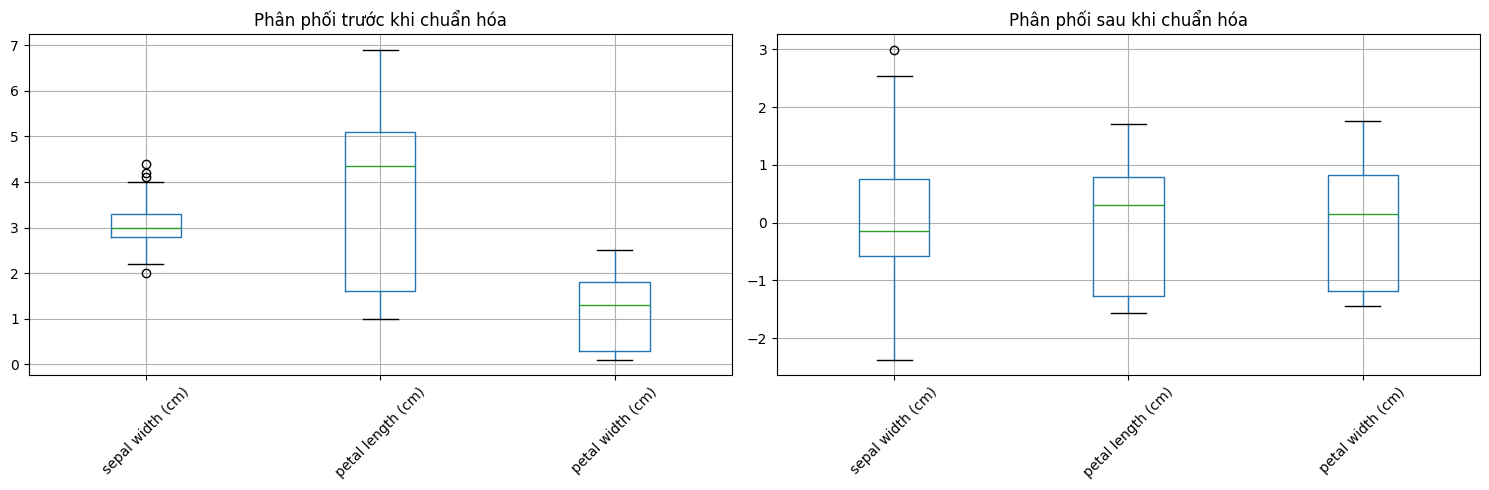


Kết quả hồi quy đa biến cho sepal length (cm)

Hệ số hồi quy:
sepal width (cm): 0.2967
petal length (cm): 1.3217
petal width (cm): -0.5051
Hệ số tự do (w0): 5.8092

Metrics đánh giá:
Train MSE: 0.0963
Test MSE: 0.1021
Train R2 Score: 0.8569
Test R2 Score: 0.8520


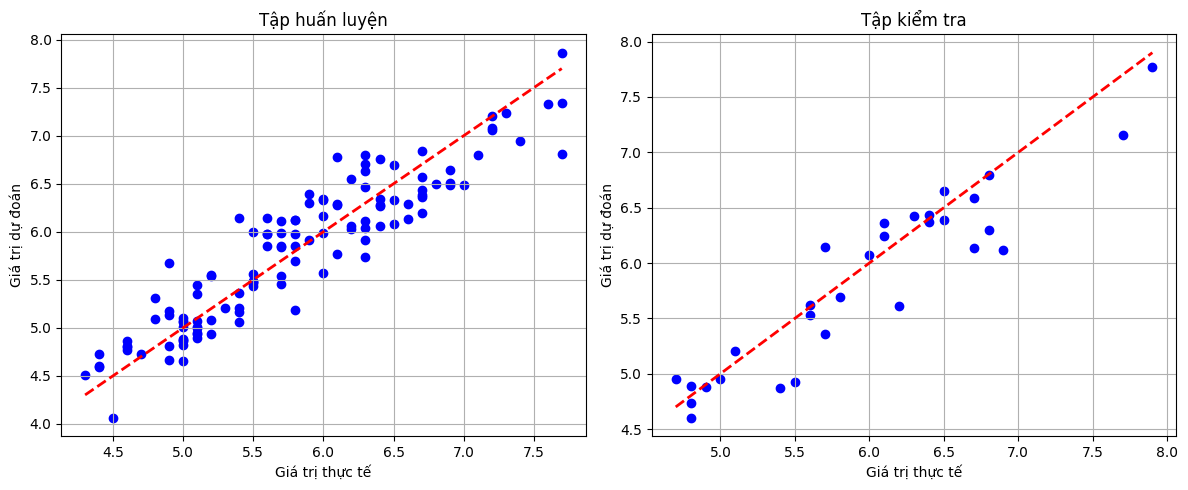

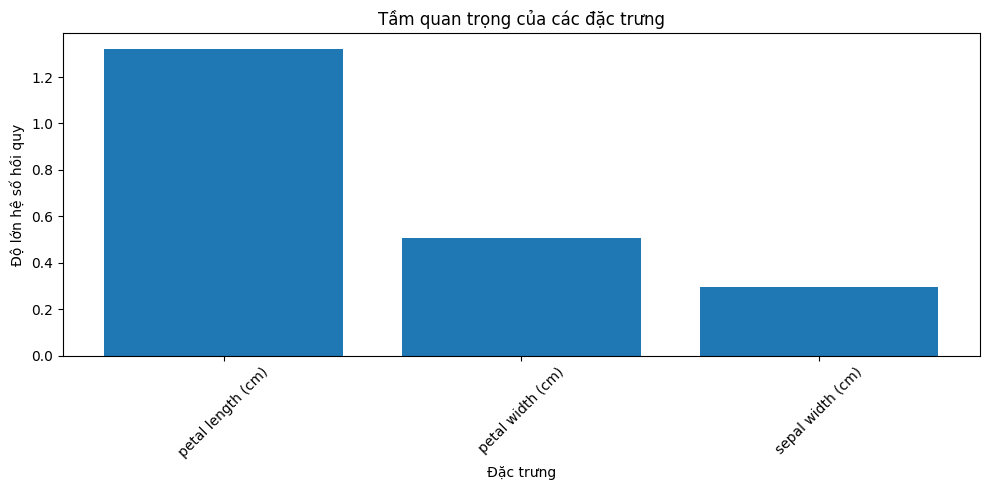


Demo dự đoán:
Đầu vào: {'sepal width (cm)': np.float64(-0.5850597637540184), 'petal length (cm)': np.float64(0.5577752408630077), 'petal width (cm)': np.float64(0.022247505360231082)}
Dự đoán sepal length (cm): 6.36


c:\Users\MSI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
# Load dữ liệu
df, feature_names = load_iris_data()

# Chọn một đặc trưng làm target (ví dụ: sepal length)
target_index = 0
target_name = feature_names[target_index]

# Chuẩn bị dữ liệu
X_train, X_test, y_train, y_test = prepare_multivariate_data(
    df, target_index=target_index, scale=True
)

# Lấy tên của các đặc trưng đầu vào
input_features = [name for i, name in enumerate(feature_names) if i != target_index]

# Huấn luyện và đánh giá mô hình
model = train_multivariate_model(
    X_train, X_test, y_train, y_test,
    input_features, target_name
)

# Demo dự đoán
print("\nDemo dự đoán:")
sample_input = X_test.iloc[0]
print("Đầu vào:", dict(sample_input))
prediction = model.predict([sample_input])[0]
print(f"Dự đoán {target_name}: {prediction:.2f}")